# Data Validation

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
from utils.load_dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
RAW_DIR = os.getenv("RAW_DIR")
DATASET_DIR = os.getenv("DATASETS_DIR")
PROCESSED_DIR = os.getenv("PROCESSED_DIR")

WEATHER_DATASET = output_path = os.path.join(DATASET_DIR, "weather_sj_2010_2024.csv")

In [5]:
df = pd.read_csv(WEATHER_DATASET)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5479 non-null   object 
 1   datetime          5479 non-null   object 
 2   tempmax           5479 non-null   float64
 3   tempmin           5479 non-null   float64
 4   temp              5479 non-null   float64
 5   feelslikemax      5479 non-null   float64
 6   feelslikemin      5479 non-null   float64
 7   feelslike         5479 non-null   float64
 8   dew               5479 non-null   float64
 9   humidity          5479 non-null   float64
 10  precip            5479 non-null   float64
 11  precipprob        5479 non-null   int64  
 12  precipcover       5479 non-null   float64
 13  preciptype        906 non-null    object 
 14  snow              5479 non-null   int64  
 15  snowdepth         5479 non-null   float64
 16  windgust          4755 non-null   float64


In [7]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"San Jose, CA, United States",2010-01-01,62.2,49.9,54.4,62.2,48.4,54.3,46.6,75.5,...,4.1,3,NaN,2010-01-01T07:21:55,2010-01-01T17:00:41,0.54,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KSJC,KLVK,72492723285,74509023244,72494523293,..."
1,"San Jose, CA, United States",2010-01-02,57.3,46.7,51.8,57.3,44.9,51.7,47.7,86.0,...,8.3,4,NaN,2010-01-02T07:22:03,2010-01-02T17:01:30,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSJC,KLVK,72492723285,74509023244,72494523293,..."
2,"San Jose, CA, United States",2010-01-03,60.2,39.4,48.2,60.2,37.5,48.1,43.2,83.6,...,9.8,5,NaN,2010-01-03T07:22:09,2010-01-03T17:02:19,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSJC,KLVK,72492723285,74509023244,72494523293,..."
3,"San Jose, CA, United States",2010-01-04,56.9,43.0,48.5,56.9,43.0,48.3,43.7,84.1,...,10.9,5,NaN,2010-01-04T07:22:13,2010-01-04T17:03:11,0.64,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KSJC,KLVK,72492723285,74509023244,72494523293,..."
4,"San Jose, CA, United States",2010-01-05,58.9,39.1,47.5,58.9,35.7,47.1,41.9,81.7,...,5.9,3,NaN,2010-01-05T07:22:15,2010-01-05T17:04:03,0.67,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"KSJC,KLVK,72492723285,74509023244,72494523293,..."


In [8]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [9]:
# Check missing values

missing_report = df.isnull().sum()
missing = missing_report[missing_report > 0]
if missing.empty:
    print("No missing values found")
else:
    print(missing)


preciptype    4573
windgust       724
severerisk    4850
dtype: int64


In [10]:
# Check duplicates

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
# Data consistency

print(df[["tempmax", "tempmin", "temp"]].describe())
print(df[df['tempmax'] < df['tempmin']])

print(df['preciptype'].value_counts())
print(df['conditions'].value_counts())

           tempmax      tempmin         temp
count  5479.000000  5479.000000  5479.000000
mean     71.204508    51.798704    60.353751
std      10.175763     7.636690     7.951825
min      46.600000    27.000000    37.700000
25%      62.900000    46.200000    54.200000
50%      71.100000    53.000000    60.400000
75%      78.500000    57.500000    66.300000
max     108.900000    79.100000    89.900000
Empty DataFrame
Columns: [name, datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations]
Index: []

[0 rows x 33 columns]
preciptype
rain    906
Name: count, dtype: int64
conditions
Partially cloudy          3121
Clear                     1384
Rain, Partially cloudy     713
Rain, Overcast             181
Overc

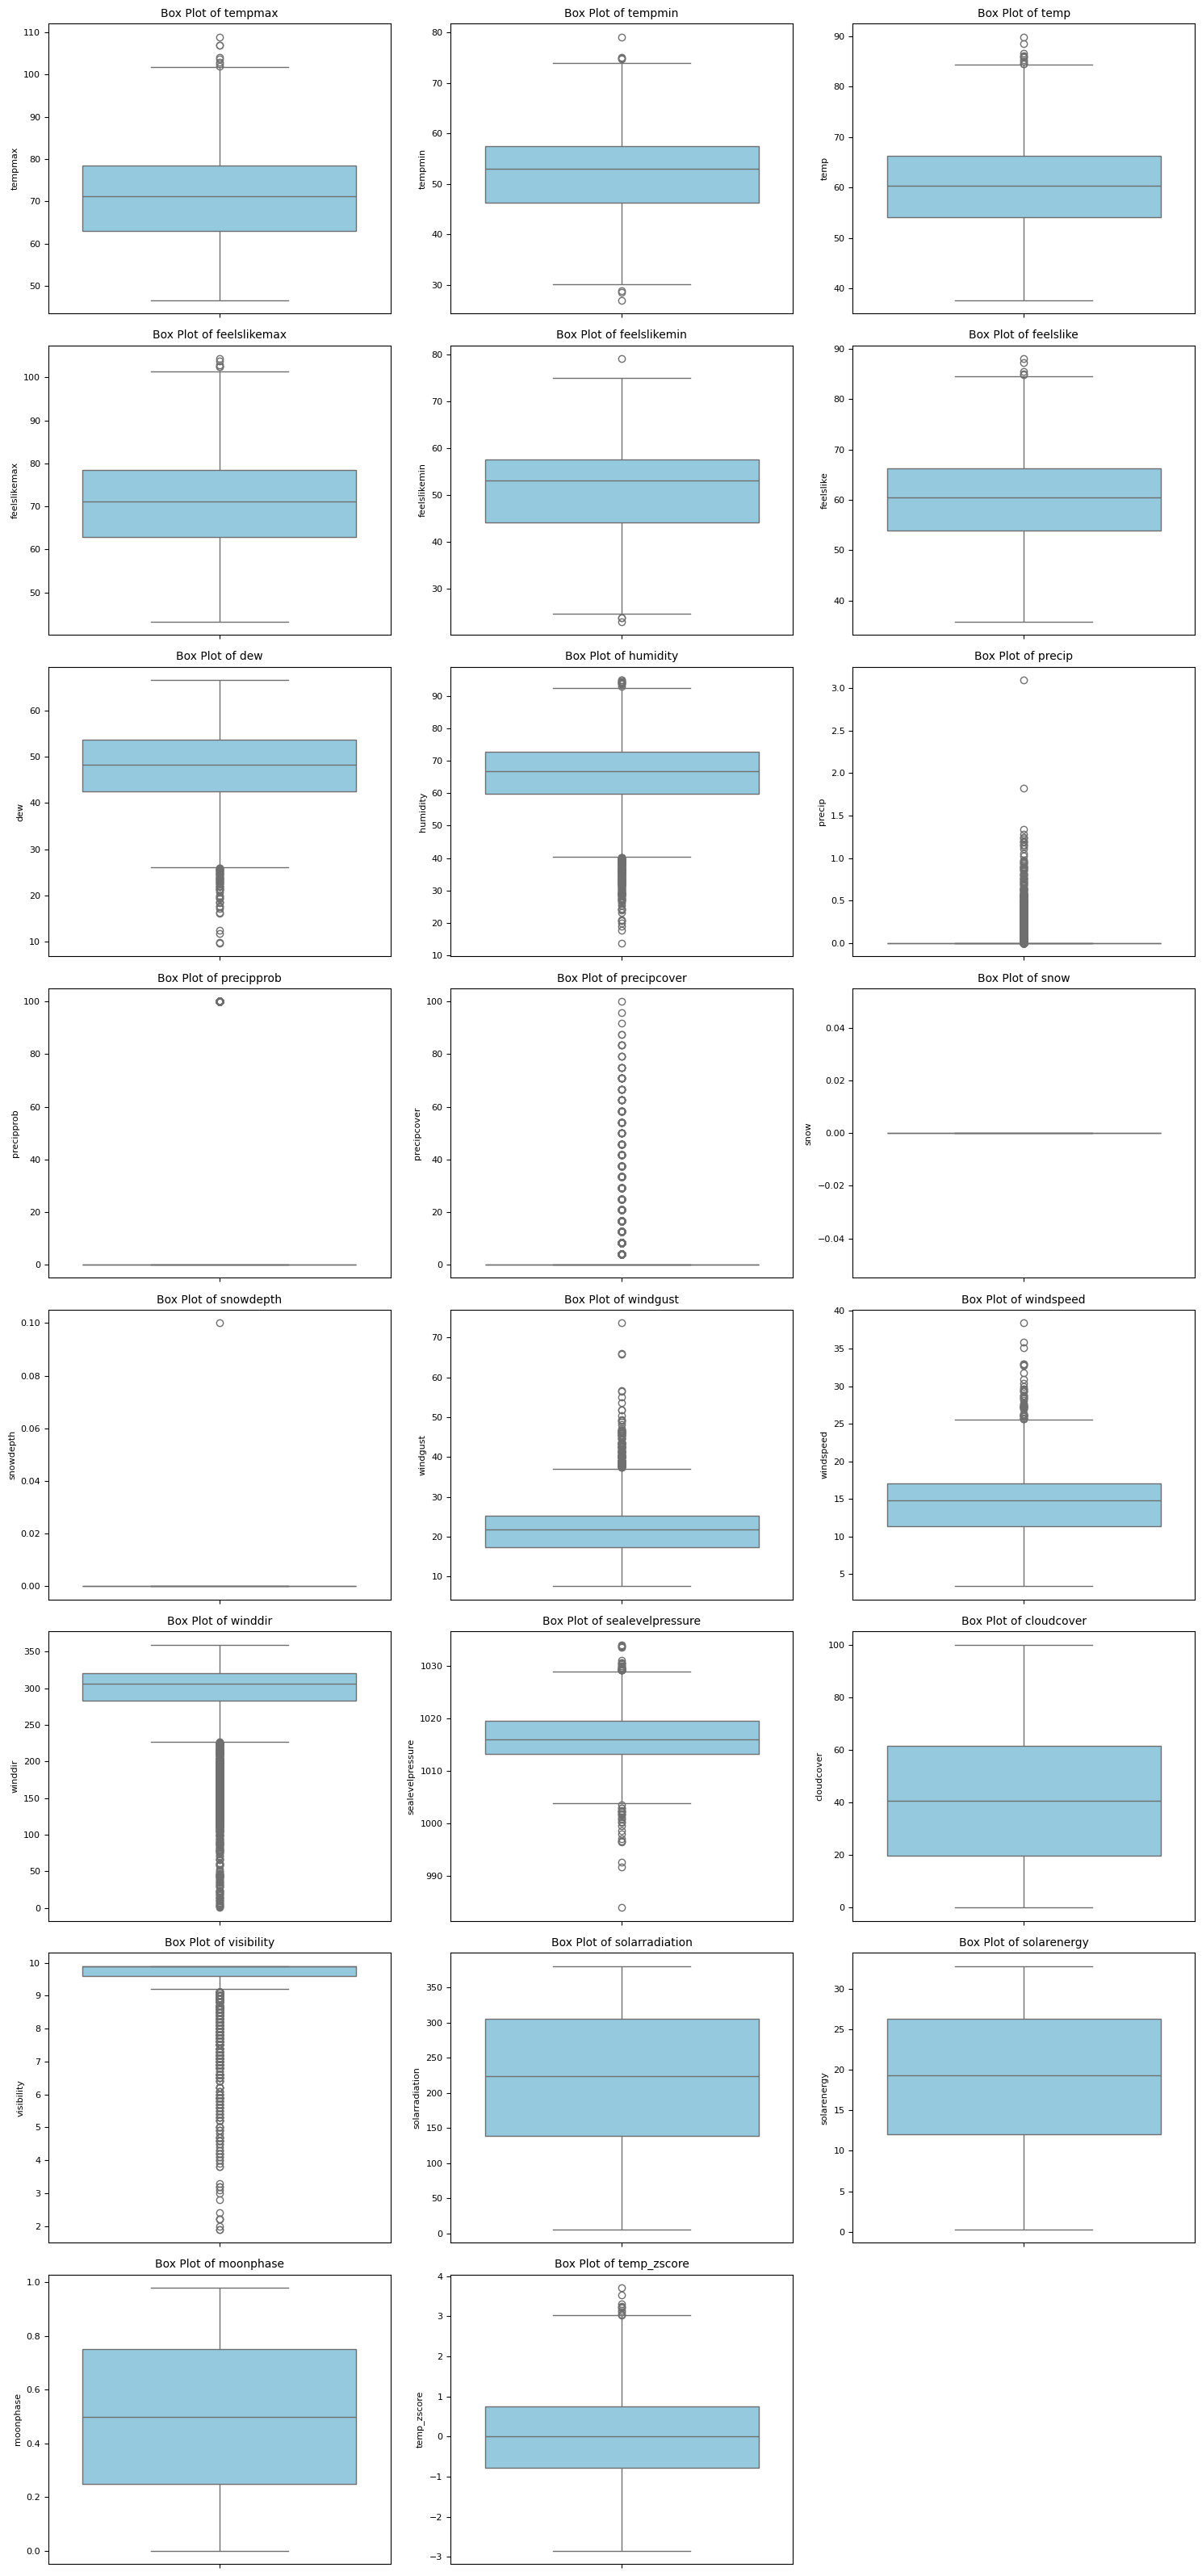

In [26]:
# Outliers

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in ['uvindex', 'severerisk']]

n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}', fontsize=10)
    axes[i].set_ylabel(column, fontsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Temporal continuity

df['datetime'] = pd.to_datetime(df['datetime'])
start_date = df['datetime'].min()
end_date = df['datetime'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
missing_dates = date_range[~date_range.isin(df['datetime'])]
print(f"Missing dates: {missing_dates}")

# Check if dates are in order
print(df['datetime'].is_monotonic_increasing)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')
True


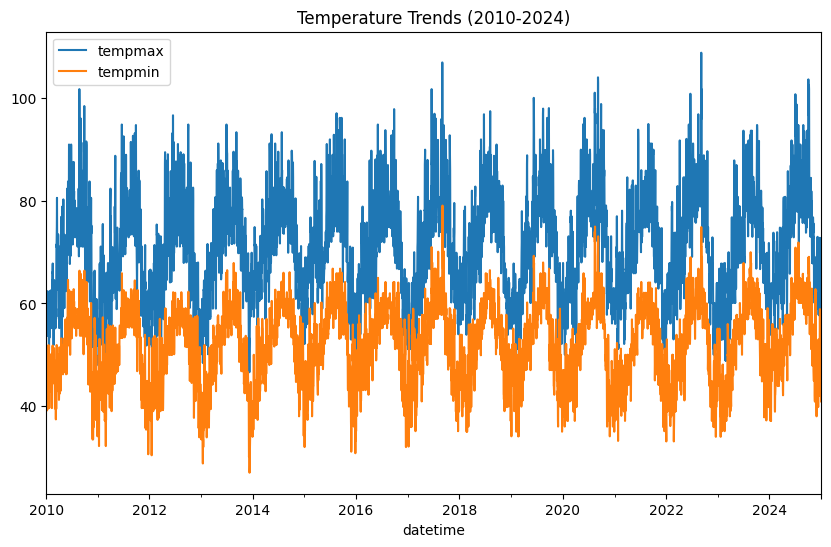

In [22]:
# Time series plot for temperature

df.plot(x='datetime', y=['tempmax', 'tempmin'], figsize=(10, 6))
plt.title('Temperature Trends (2010-2024)')
plt.show()

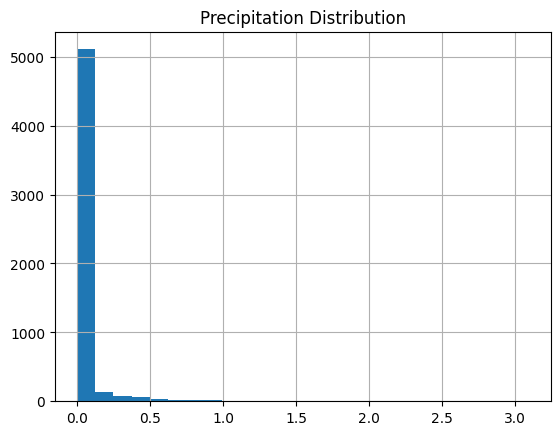

In [23]:
# Histogram for precipitation

df['precip'].hist(bins=25)
plt.title('Precipitation Distribution')
plt.show()